In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
cricinfo_page = requests.get("https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;template=results;type=batting")

In [4]:
cricinfo_page

<Response [200]>

In [6]:
soup = BeautifulSoup(cricinfo_page.content,"html.parser")

In [8]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<!-- hostname: web003, edition-view: , country: unknown, cluster: www, created: 2020-06-16 19:58:08 -->
<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://developers.facebook.com/schema/" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <script type="text/javascript">
   var _sf_startpt=(new Date()).getTime()
  </script>
  <meta content="ZxdgH3XglRg0Bsy-Ho2RnO3EE4nRs53FloLS6fkt_nc" name="google-site-verification"/>
  <title>
   Batting records | One-Day Internationals | Cricinfo Statsguru | ESPNcricinfo.com
  </title>
  <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
  <meta content="" name="keywords"/>
  <meta content="" name="description"/>
  <!--[if IE 9]>
<script language="javascript" type="text/javascript">
function fnCreateJumpList(iScenario) {
fnClearJumpList();
window.external.msSiteModeCreateJumpList("Quick Links")
win

In [9]:
tables = soup.find_all(class_ = "engineTable")

In [10]:
tables

[<table class="engineTable" style="margin:0px;">
 <tr class="data2">
 <td class="left">
 <b>View</b> overall figures
 [<a href="javascript:void(0)" onmouseout="menuLayers.hide()" onmouseover="menuLayers.show('engine-dd-view', event); window.status='change view'; return true">change view</a>]
 
   </td>
 </tr>
 <tr class="data2">
 <td class="left">
 <b>Ordered by</b> runs scored (descending)
 
   </td>
 </tr></table>, <table class="engineTable" style="margin-bottom:5px;">
 <tr class="data2">
 <td class="left" style="vertical-align:middle">
    Page <b>1</b> of <b>53</b>
 </td>
 <td class="left" style="vertical-align:middle">
    Showing <b>1</b> - <b>50</b> of <b>2611</b>
 </td>
 <td class="left" style="vertical-align:middle">
 <td class="left" style="vertical-align:middle">
 <img align="texttop" alt="First page" border="0" height="13" src="http://i.imgci.com/espncricinfo/ciPhotoFirst-icon_13x13.gif" style="padding-right:5px;" title="First page" width="13"/><span class="Paginationdisabl

In [11]:
len(tables)

6

In [ ]:
# From inspecting the tables, the tabe with data is the 3rd (2nd) table

In [12]:
scores = tables[2]

In [14]:
print(scores.prettify())

<table class="engineTable">
 <caption>
  Overall figures
 </caption>
 <thead>
  <tr class="headlinks">
   <th class="left" nowrap="">
    <a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=player;template=results;type=batting" title="sort by player name">
     Player
    </a>
   </th>
   <th class="left" nowrap="">
    <a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=start;template=results;type=batting" title="sort by start date">
     Span
    </a>
   </th>
   <th nowrap="">
    <a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=matches;template=results;type=batting" title="sort by matches played">
     Mat
    </a>
   </th>
   <th nowrap="">
    <a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=innings;template=results;type=batting" title="sort by innings batted">
     Inns
    </a>
   </th>
   <th nowrap="">
    <a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=notouts;templa

In [29]:
ths = scores.find("thead").find(class_ = "headlinks").find_all("th")
ths

[<th class="left" nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=player;template=results;type=batting" title="sort by player name">Player</a></th>,
 <th class="left" nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=start;template=results;type=batting" title="sort by start date">Span</a></th>,
 <th nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=matches;template=results;type=batting" title="sort by matches played">Mat</a></th>,
 <th nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=innings;template=results;type=batting" title="sort by innings batted">Inns</a></th>,
 <th nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=notouts;template=results;type=batting" title="sort by not outs">NO</a></th>,
 <th nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=runs;orderbyad=reverse;template=results;type

In [30]:
header_names = [th.get_text() for th in ths]

In [31]:
header_names

['Player',
 'Span',
 'Mat',
 'Inns',
 'NO',
 'Runs',
 'HS',
 'Ave',
 'BF',
 'SR',
 '100',
 '50',
 '0',
 '']

In [32]:
batter_data = scores.find("tbody")

In [34]:
print(batter_data.prettify())

<tbody>
 <tr class="data1">
  <td class="left" nowrap="nowrap">
   <a class="data-link" href="/ci/content/player/35320.html">
    SR Tendulkar
   </a>
   (INDIA)
  </td>
  <td class="left" nowrap="nowrap">
   1989-2012
  </td>
  <td>
   463
  </td>
  <td>
   452
  </td>
  <td>
   41
  </td>
  <td>
   <b>
    18426
   </b>
  </td>
  <td>
   200*
  </td>
  <td>
   44.83
  </td>
  <td>
   21368
  </td>
  <td>
   86.23
  </td>
  <td>
   49
  </td>
  <td>
   96
  </td>
  <td>
   20
  </td>
  <td class="padDD">
   <a href="javascript:void(0)" onmouseout="menuLayers.hide()" onmouseover="menuLayers.show('engine-dd1', event); window.status='investigate this query'; return true">
    <img alt="investigate this query" border="0" height="11" src="http://i.imgci.com/espncricinfo/guruInvestigate.gif" width="11"/>
   </a>
  </td>
 </tr>
 <tr class="data1">
  <td class="left" nowrap="nowrap">
   <a class="data-link" href="/ci/content/player/50710.html">
    KC Sangakkara
   </a>
   (Asia/ICC/SL)
  </t

In [35]:
batters = batter_data.find_all("tr",class_ = "data1")

In [36]:
batters

[<tr class="data1">
 <td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/player/35320.html">SR Tendulkar</a> (INDIA)</td>
 <td class="left" nowrap="nowrap">1989-2012</td>
 <td>463</td>
 <td>452</td>
 <td>41</td>
 <td><b>18426</b></td>
 <td>200*</td>
 <td>44.83</td>
 <td>21368</td>
 <td>86.23</td>
 <td>49</td>
 <td>96</td>
 <td>20</td>
 <td class="padDD"><a href="javascript:void(0)" onmouseout="menuLayers.hide()" onmouseover="menuLayers.show('engine-dd1', event); window.status='investigate this query'; return true"><img alt="investigate this query" border="0" height="11" src="http://i.imgci.com/espncricinfo/guruInvestigate.gif" width="11"/></a></td>
 </tr>, <tr class="data1">
 <td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/player/50710.html">KC Sangakkara</a> (Asia/ICC/SL)</td>
 <td class="left" nowrap="nowrap">2000-2015</td>
 <td>404</td>
 <td>380</td>
 <td>41</td>
 <td><b>14234</b></td>
 <td class="padAst">169</td>
 <td>41.98</td>
 <td>1804

In [38]:
batter1 = batters[0]

In [39]:
batter1

<tr class="data1">
<td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/player/35320.html">SR Tendulkar</a> (INDIA)</td>
<td class="left" nowrap="nowrap">1989-2012</td>
<td>463</td>
<td>452</td>
<td>41</td>
<td><b>18426</b></td>
<td>200*</td>
<td>44.83</td>
<td>21368</td>
<td>86.23</td>
<td>49</td>
<td>96</td>
<td>20</td>
<td class="padDD"><a href="javascript:void(0)" onmouseout="menuLayers.hide()" onmouseover="menuLayers.show('engine-dd1', event); window.status='investigate this query'; return true"><img alt="investigate this query" border="0" height="11" src="http://i.imgci.com/espncricinfo/guruInvestigate.gif" width="11"/></a></td>
</tr>

In [46]:
tds_batter1 = batter1.find_all("td")

In [ ]:
batt

In [47]:
batter1_row = [td.get_text() for td in tds_batter1]
batter1_row

['SR Tendulkar (INDIA)',
 '1989-2012',
 '463',
 '452',
 '41',
 '18426',
 '200*',
 '44.83',
 '21368',
 '86.23',
 '49',
 '96',
 '20',
 '']

# Creating a matrix of batter data

In [49]:
batters_td_matrix = [batter.find_all("td") for batter in batters]

In [50]:
batter_matrix = []
for batter in batters_td_matrix:
    batter_matrix.append([td.get_text() for td in batter])

In [51]:
batter_matrix

[['SR Tendulkar (INDIA)',
  '1989-2012',
  '463',
  '452',
  '41',
  '18426',
  '200*',
  '44.83',
  '21368',
  '86.23',
  '49',
  '96',
  '20',
  ''],
 ['KC Sangakkara (Asia/ICC/SL)',
  '2000-2015',
  '404',
  '380',
  '41',
  '14234',
  '169',
  '41.98',
  '18048',
  '78.86',
  '25',
  '93',
  '15',
  ''],
 ['RT Ponting (AUS/ICC)',
  '1995-2012',
  '375',
  '365',
  '39',
  '13704',
  '164',
  '42.03',
  '17046',
  '80.39',
  '30',
  '82',
  '20',
  ''],
 ['ST Jayasuriya (Asia/SL)',
  '1989-2011',
  '445',
  '433',
  '18',
  '13430',
  '189',
  '32.36',
  '14725',
  '91.20',
  '28',
  '68',
  '34',
  ''],
 ['DPMD Jayawardene (Asia/SL)',
  '1998-2015',
  '448',
  '418',
  '39',
  '12650',
  '144',
  '33.37',
  '16020',
  '78.96',
  '19',
  '77',
  '28',
  ''],
 ['V Kohli (INDIA)',
  '2008-2020',
  '248',
  '239',
  '39',
  '11867',
  '183',
  '59.33',
  '12726',
  '93.25',
  '43',
  '58',
  '13',
  ''],
 ['Inzamam-ul-Haq (Asia/PAK)',
  '1991-2007',
  '378',
  '350',
  '53',
  '11739',

# Creating DataFrame

In [54]:
cricinfo = pd.DataFrame(batter_matrix,columns = header_names)

In [55]:
cricinfo

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,
5,V Kohli (INDIA),2008-2020,248,239,39,11867,183,59.33,12726,93.25,43,58,13,
6,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,
7,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,
8,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,
9,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15285,71.23,12,83,13,


# Multiple Pages

Now, I am creating a function to create the df and then another function to include the top 650 batters spread out through multiple pages.

In [3]:
page_1_url = "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;template=results;type=batting"


def create_df(page_url):
    cricinfo_page = requests.get(page_url)

    soup = BeautifulSoup(cricinfo_page.content,"html.parser")

    tables = soup.find_all(class_ = "engineTable")

    scores = tables[2]

    ths = scores.find("thead").find(class_ = "headlinks").find_all("th")

    header_names = [th.get_text() for th in ths]

    batter_data = scores.find("tbody")

    batters = batter_data.find_all("tr",class_ = "data1")

    batters_td_matrix = [batter.find_all("td") for batter in batters]

    batter_matrix = []
    for batter in batters_td_matrix:
        batter_matrix.append([td.get_text() for td in batter])

    cricinfo = pd.DataFrame(batter_matrix,columns = header_names)
    return cricinfo
  


In [4]:
next_pages = ["https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=2;template=results;type=batting", 
              "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=3;template=results;type=batting",
              "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=4;template=results;type=batting",
             "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=5;template=results;type=batting",
             "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=6;template=results;type=batting",
             "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=7;template=results;type=batting",
             "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=8;template=results;type=batting",
             "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=9;template=results;type=batting",
             "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=10;template=results;type=batting",
             "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=11;template=results;type=batting",
             "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=12;template=results;type=batting",
             "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;page=13;template=results;type=batting"]

cricinfo = create_df(page_1_url)

def append_df(orig_df,new_df):
    return (orig_df.append(new_df).reset_index(inplace = True))
    
for next_page in next_pages:
    new_df = create_df(next_page)
    cricinfo = cricinfo.append(new_df,ignore_index=True)

In [5]:
final_df = cricinfo

In [8]:
final_df.shape[0]

650

In [249]:
final_df.head(1)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,


In [10]:
cricinfo.head(3)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,


# Data Analysis

In [11]:
plt.rcParams['figure.figsize'] = (19,11)

In [12]:
sns.set_style("darkgrid")

In [198]:
#cricinfo = final_df

In [13]:
cricinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 14 columns):
Player    650 non-null object
Span      650 non-null object
Mat       650 non-null object
Inns      650 non-null object
NO        650 non-null object
Runs      650 non-null object
HS        650 non-null object
Ave       650 non-null object
BF        650 non-null object
SR        650 non-null object
100       650 non-null object
50        650 non-null object
0         650 non-null object
          650 non-null object
dtypes: object(14)
memory usage: 71.2+ KB


In [203]:
cricinfo.describe()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,
count,650,650,650,650,650,650,650,650,650,650,650,650,650,650
unique,650,328,227,206,60,577,261,584,606,598,30,70,29,1
top,SCJ Broad (ENG),2014-2019,54,24,1,575,101,24.94,787,72.04,0,4,4,
freq,1,12,12,13,51,4,10,3,3,3,286,59,75,650


In [14]:
cricinfo.columns[-1]

''

In [15]:
cricinfo.drop('',axis = 1,inplace = True)

In [16]:
cricinfo.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [17]:
cricinfo.loc[0,'HS']

'200*'

In [18]:
cricinfo.loc[1,'HS']

'169'

In [19]:
for col in cricinfo.columns[2:]:
    cricinfo[col] = cricinfo[col].apply(lambda string: float(str(string).split("*")[0]))

In [20]:
cricinfo

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463.0,452.0,41.0,18426.0,200.0,44.83,21368.0,86.23,49.0,96.0,20.0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404.0,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0
2,RT Ponting (AUS/ICC),1995-2012,375.0,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0
3,ST Jayasuriya (Asia/SL),1989-2011,445.0,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0
4,DPMD Jayawardene (Asia/SL),1998-2015,448.0,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0
5,V Kohli (INDIA),2008-2020,248.0,239.0,39.0,11867.0,183.0,59.33,12726.0,93.25,43.0,58.0,13.0
6,Inzamam-ul-Haq (Asia/PAK),1991-2007,378.0,350.0,53.0,11739.0,137.0,39.52,15812.0,74.24,10.0,83.0,20.0
7,JH Kallis (Afr/ICC/SA),1996-2014,328.0,314.0,53.0,11579.0,139.0,44.36,15885.0,72.89,17.0,86.0,17.0
8,SC Ganguly (Asia/INDIA),1992-2007,311.0,300.0,23.0,11363.0,183.0,41.02,15416.0,73.70,22.0,72.0,16.0
9,R Dravid (Asia/ICC/INDIA),1996-2011,344.0,318.0,40.0,10889.0,153.0,39.16,15285.0,71.23,12.0,83.0,13.0


In [21]:
cricinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 13 columns):
Player    650 non-null object
Span      650 non-null object
Mat       650 non-null float64
Inns      650 non-null float64
NO        650 non-null float64
Runs      650 non-null float64
HS        650 non-null float64
Ave       650 non-null float64
BF        650 non-null float64
SR        650 non-null float64
100       650 non-null float64
50        650 non-null float64
0         650 non-null float64
dtypes: float64(11), object(2)
memory usage: 66.1+ KB


In [22]:
cricinfo.describe()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,100.846154,87.830769,13.275385,2339.650769,104.384615,28.999338,3064.209231,76.305954,2.755385,13.044615,6.206154
std,80.739672,72.512401,13.812285,2514.414733,36.866349,9.515282,3165.425180,13.439294,5.285108,15.921984,5.324649
min,11.000000,11.000000,0.000000,449.000000,26.000000,6.800000,404.000000,45.530000,0.000000,0.000000,0.000000
25%,41.000000,38.000000,3.000000,734.250000,77.000000,22.605000,990.750000,67.470000,0.000000,3.000000,2.000000
50%,74.500000,62.000000,9.000000,1281.500000,102.500000,28.000000,1717.000000,75.055000,1.000000,7.000000,5.000000
75%,136.000000,113.750000,18.000000,2864.000000,127.000000,35.030000,3756.500000,83.877500,3.000000,16.000000,8.000000
max,463.000000,452.000000,84.000000,18426.000000,264.000000,70.700000,21368.000000,130.220000,49.000000,96.000000,34.000000


### Adding Country Column

In [23]:
cricinfo['Country'] = cricinfo['Player'].apply(lambda player: player.split("(")[-1].split("/")[-1][0:-1])

In [24]:
cricinfo

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Country
0,SR Tendulkar (INDIA),1989-2012,463.0,452.0,41.0,18426.0,200.0,44.83,21368.0,86.23,49.0,96.0,20.0,INDIA
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404.0,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0,SL
2,RT Ponting (AUS/ICC),1995-2012,375.0,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0,ICC
3,ST Jayasuriya (Asia/SL),1989-2011,445.0,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0,SL
4,DPMD Jayawardene (Asia/SL),1998-2015,448.0,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0,SL
5,V Kohli (INDIA),2008-2020,248.0,239.0,39.0,11867.0,183.0,59.33,12726.0,93.25,43.0,58.0,13.0,INDIA
6,Inzamam-ul-Haq (Asia/PAK),1991-2007,378.0,350.0,53.0,11739.0,137.0,39.52,15812.0,74.24,10.0,83.0,20.0,PAK
7,JH Kallis (Afr/ICC/SA),1996-2014,328.0,314.0,53.0,11579.0,139.0,44.36,15885.0,72.89,17.0,86.0,17.0,SA
8,SC Ganguly (Asia/INDIA),1992-2007,311.0,300.0,23.0,11363.0,183.0,41.02,15416.0,73.70,22.0,72.0,16.0,INDIA
9,R Dravid (Asia/ICC/INDIA),1996-2011,344.0,318.0,40.0,10889.0,153.0,39.16,15285.0,71.23,12.0,83.0,13.0,INDIA


In [25]:
cricinfo[cricinfo['Country'] == 'ICC']

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Country
2,RT Ponting (AUS/ICC),1995-2012,375.0,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0,ICC
15,AC Gilchrist (AUS/ICC),1996-2008,287.0,279.0,11.0,9619.0,172.0,35.89,9922.0,96.94,16.0,55.0,19.0,ICC
58,ML Hayden (AUS/ICC),1993-2008,161.0,155.0,15.0,6133.0,181.0,43.80,7767.0,78.96,10.0,36.0,9.0,ICC
98,KP Pietersen (ENG/ICC),2004-2013,136.0,125.0,16.0,4440.0,130.0,40.73,5128.0,86.58,9.0,25.0,7.0,ICC
136,A Flintoff (ENG/ICC),1999-2009,141.0,122.0,16.0,3394.0,123.0,32.01,3821.0,88.82,3.0,18.0,9.0,ICC
384,SK Warne (AUS/ICC),1993-2005,194.0,107.0,29.0,1018.0,55.0,13.05,1413.0,72.04,0.0,1.0,10.0,ICC
545,D Gough (ENG/ICC),1994-2006,159.0,87.0,38.0,609.0,46.0,12.42,947.0,64.30,0.0,0.0,10.0,ICC


In [26]:
cricinfo['Country'] = cricinfo[['Player','Country']].apply(lambda cols: cols[0].split('(')[-1].split("/")[0] if cols[1] == 'ICC' else cols[1],axis = 1)

In [27]:
cricinfo.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Country
0,SR Tendulkar (INDIA),1989-2012,463.0,452.0,41.0,18426.0,200.0,44.83,21368.0,86.23,49.0,96.0,20.0,INDIA
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404.0,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0,SL
2,RT Ponting (AUS/ICC),1995-2012,375.0,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0,AUS
3,ST Jayasuriya (Asia/SL),1989-2011,445.0,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0,SL
4,DPMD Jayawardene (Asia/SL),1998-2015,448.0,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0,SL


In [28]:
cricinfo["Start Year"] = cricinfo["Span"].apply(lambda span: int(span.split('-')[0]))
cricinfo["End Year"] = cricinfo["Span"].apply(lambda span: int(span.split('-')[1]))

In [29]:
cricinfo.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Country,Start Year,End Year
0,SR Tendulkar (INDIA),1989-2012,463.0,452.0,41.0,18426.0,200.0,44.83,21368.0,86.23,49.0,96.0,20.0,INDIA,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404.0,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0,SL,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375.0,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0,AUS,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445.0,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0,SL,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448.0,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0,SL,1998,2015


In [30]:
cricinfo.drop('Span',axis = 1,inplace = True)

In [31]:
cricinfo.head(1)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Country,Start Year,End Year
0,SR Tendulkar (INDIA),463.0,452.0,41.0,18426.0,200.0,44.83,21368.0,86.23,49.0,96.0,20.0,INDIA,1989,2012


In [32]:
cricinfo['Career Duration'] = cricinfo[['Start Year','End Year']].apply(lambda years: years[1] - years[0],axis = 1)

In [33]:
cricinfo.head(2)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Country,Start Year,End Year,Career Duration
0,SR Tendulkar (INDIA),463.0,452.0,41.0,18426.0,200.0,44.83,21368.0,86.23,49.0,96.0,20.0,INDIA,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),404.0,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0,SL,2000,2015,15


In [34]:
country_batters = cricinfo.groupby('Country').mean().sort_values("Ave",ascending = False).reset_index()

In [35]:
country_batters

,Country,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start Year,End Year,Career Duration
0,OMAN,11.000000,11.000000,2.000000,621.000000,109.000000,69.000000,768.000000,80.850000,2.000000,4.000000,0.000000,2019.000000,2020.000000,1.000000
1,HKG,20.000000,20.000000,1.333333,762.333333,108.666667,41.566667,964.333333,79.350000,0.333333,6.000000,1.333333,2014.000000,2018.000000,4.000000
2,SA,108.893617,92.808511,17.723404,2757.914894,112.957447,33.238723,3437.617021,80.672553,3.893617,15.489362,5.340426,2002.000000,2009.595745,7.595745
3,UAE,25.857143,25.428571,1.428571,726.285714,105.142857,32.808571,952.000000,75.944286,0.714286,4.428571,1.428571,2012.714286,2018.000000,5.285714
4,AUS,105.157143,90.628571,15.085714,2665.157143,106.728571,32.557000,3385.500000,79.377429,3.228571,15.871429,5.371429,1995.700000,2003.785714,8.085714
5,ENG,81.806452,71.338710,10.322581,2016.064516,104.822581,30.855806,2617.016129,76.527742,2.596774,11.064516,4.967742,1995.225806,2003.629032,8.403226
6,NL,38.090909,34.818182,4.181818,880.090909,97.454545,30.557273,1191.727273,76.472727,0.727273,5.090909,2.818182,2005.545455,2013.000000,7.454545
7,INDIA,135.866667,112.650000,19.600000,3212.300000,110.333333,30.388833,4036.816667,78.437833,4.900000,18.033333,7.233333,1996.183333,2005.750000,9.566667
8,PAK,125.245902,109.622951,16.721311,2867.393443,104.967213,30.125574,3780.131148,75.579180,3.262295,15.852459,8.065574,1995.786885,2005.983607,10.196721
9,WI,103.796610,91.033898,14.101695,2440.000000,106.779661,28.541525,3277.813559,76.509153,3.016949,13.372881,6.508475,1997.508475,2007.135593,9.627119


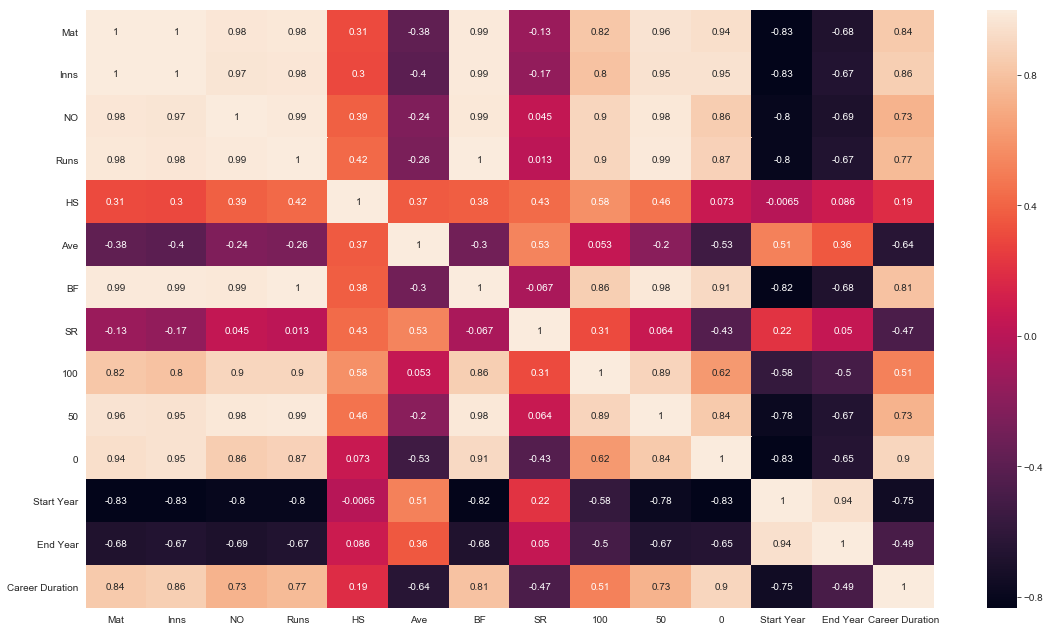

In [36]:
sns.heatmap(country_batters.corr(),annot = True)

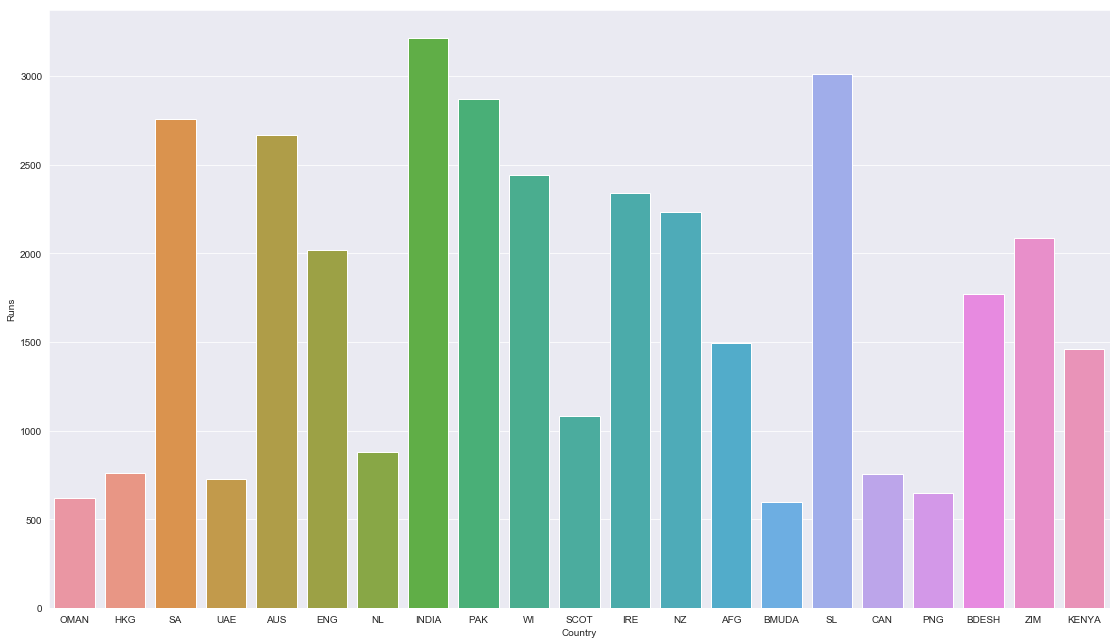

In [37]:
sns.barplot(data = country_batters,x = "Country",y = "Runs")

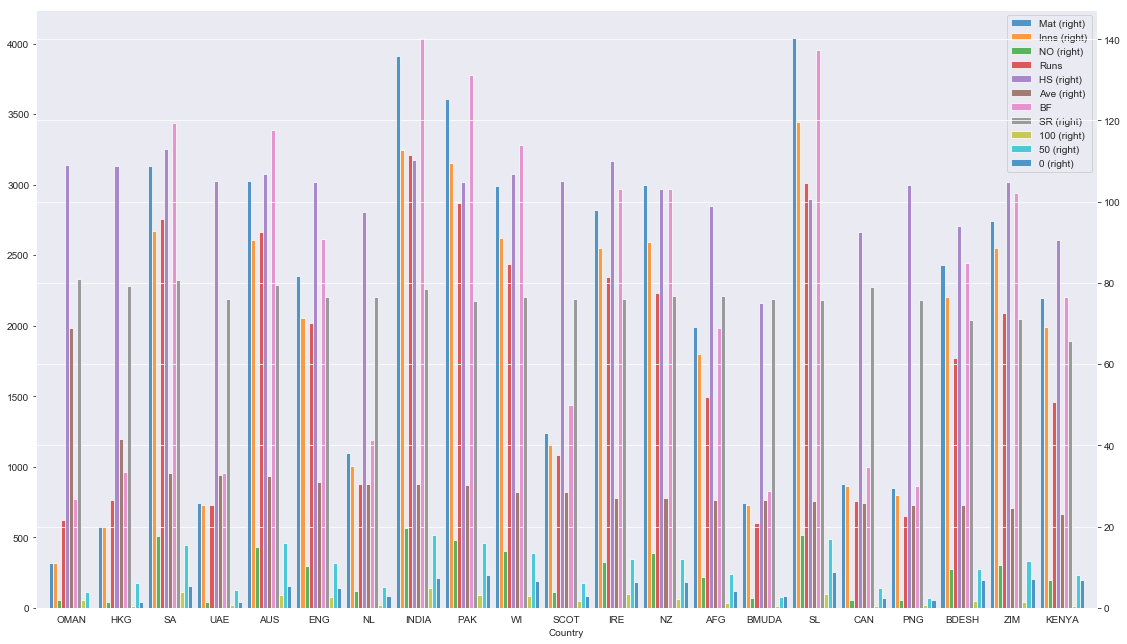

In [38]:
country_batters.plot(kind = "bar",x = "Country",y = country_batters.columns.drop(["Country","Start Year","End Year","Career Duration"]),secondary_y = list(country_batters.columns.drop(["Country","Runs","BF","Start Year","End Year","Career Duration"])),width = 0.9,rot = 0,alpha = .75)
plt.show()

# Machine Learning Algorithms

In [39]:
def convert_cat(df, cat_cols,output_col=None):
    """
    This function converts all categorical columns into numerical boolean columns.
    
    There are 3 parameters: df, cat_cols, and output_var. 
    
    1. df is the dataframe which needs to have categorical variables converted to numerical variables
    2. cat_cols needs to be a list that contains the names of all categorical columns that need to be converted.
    3. output_var is the name of the output or response variable.  It is set to 'Output' as default."""
    
    df.reset_index(inplace = True, drop = True)
    df_out = df.copy()
    
    for col in cat_cols:
        dummy_col = pd.get_dummies(df_out[col],drop_first = True)
        df_out.drop(col,axis=1, inplace = True)
        df_out = df_out.join(dummy_col)
    
    if output_col != None:
        loc_df_out = list(df_out.columns).index(output_col)
        df_out = df_out[list(df_out.columns[:loc_df_out]) + list(df_out.columns[loc_df_out + 1:]) + list(df_out.columns[loc_df_out:loc_df_out + 1])]
    return df_out

In [40]:
def normalize(df,cat_class = None):
    """
    This function takes in a dataframe as a parameter and returns the same dataframe with all the features normalized between 0 and 1 using rescaling (min-max normalization)
    """
    l_min = []
    l_max = []
    if cat_class == None:
        for col in df.columns:
            l_min.append(df.describe()[col]['min'])
            l_max.append(df.describe()[col]['max'])
        
        t_min = list(zip(df.columns, l_min))
        t_max = list(zip(df.columns, l_max))
 

    else:
        for col in df.drop(cat_class,axis = 1).columns:
            l_min.append(df.describe()[col]['min'])
            l_max.append(df.describe()[col]['max'])

        t_min = list(zip(df.drop(cat_class,axis = 1).columns, l_min))
        t_max = list(zip(df.drop(cat_class,axis = 1).columns, l_max))
    
   
    d_min = {}
    for col,val in t_min:
        d_min[col]=val
    
    d_max = {}
    for col,val in t_max:
        d_max[col]=val
    
    df_copy = df.copy()
    for key in d_min.keys():
        df_copy[key] = df_copy[key].apply(lambda x: (x - d_min[key])/ (d_max[key] - d_min[key]))
    
    return df_copy

In [41]:
def split_df(df,test_size = 0.3,df_to_return = 'df_train'):
    """
    This function takes in a Pandas DataFrame and returns a 
    dataframe that is a subset of that Pandas DataFrame.
    
    There are 3 parameters: df, test_size, and df_to_return
    
    df needs to be a Pandas DataFrame and is the superset dataframe to be divided.
    test_size is the proportion of the dataframe you want to be the testing dataset.
    test_size is set to 0.3 by default.
    df_to_return needs to specified as either 'df_train' or df_test' 
    to return the correct subset dataframe. df_to_return is set to 'df_train' by default
    """
    split_num = int(df.count()[0] * (1-test_size) //1)
    df_train = df.iloc[:split_num,:]
    df_test = df.iloc[split_num:,:]
    if df_to_return in ['df_train','train']:
        return df_train
    elif df_to_return in ['df_test','test']:
        return df_test

In [42]:
def shuffled_split_dfs(df,test_size = 0.3):
    """
    This function takes in a Pandas DataFrame and returns a list of 2
    dataframes.  The first dataframe is the train and the second is the test df.
    
    There are 2 parameters: df and test_size
    
    df needs to be a Pandas DataFrame and is the superset dataframe to be divided.
    test_size is the proportion of the dataframe you want to be the testing dataset.
    test_size is set to 0.3 by default.
    """
    df_copy = df.copy()
    df_copy = df_copy.sample(frac = 1).reset_index(drop = True)
    split_num = int(df_copy.count()[0] * (1-test_size) //1)
    df_train = df_copy.iloc[:split_num,:]
    df_test = df_copy.iloc[split_num:,:]
    return ([df_train,df_test])

In [43]:
def check_accuracy(df = None,pred_df = None, test_df = None, algo = 'lin',target_class = None):
    """
    This function takes in a pandas DataFrame and returns the accuracy of the model
    
    There are 2 parameters: df and algo
    
    1. df needs to be a Pandas DataFrame and algo is the algorithm used.
    2. algo is set to 'lin' by default but can also be specified as 'log'"""
    
    if algo == 'lin':
        df_out = df.copy()
        df_out['error'] = df.iloc[:,-2] - df.iloc[:,-1]
        RMSE = (sum(df_out['error']**2)/df_out.count()[0]+1) ** 0.5
        acc = (np.mean(df_out.iloc[:,-3]) - RMSE) / np.mean(df_out.iloc[:,-3])
        return {'acc':acc,'RMSE':RMSE}
    
    elif algo == 'log':
        return sum(df['Correct?']/df.count()[0])
    
    elif algo == 'knn':
        pred = pred_df[target_class]
        test = test_df[target_class]
        return sum(pred == test) / len(pred)

# Linear Regression and Logistic Regression

In [44]:
def stoch_grad_desc(dataset,output_col,cols_to_ignore = None,alpha = 0.3,epoch = 10,algo = 'lin',initial_coeffs = 1):
    """
    This function returns a list of the coefficients for the specified algorithm.  
    Currently, this function only performs Linear and Logistic Regression.
    
    The 4 parameters are: dataset, alpha, epoch, and algo
    
    1. dataset needs to be a pandas DataFrame
    2. alpha is the alpha value used in stochiastic gradient descent.  It is set at 0.3 by default.
    3. epoch is the number of iterations through each row in the dataset algorithm will perform.  epoch is set to 10 by default.
    4. algo is the specific algorithm to be used.  algo is 'lin' by default for Linear Regression but can also be specified as 'log' for Logistic Regression
    """

    loc_output_col = list(dataset.columns).index(output_col)
    dataset = dataset[list(dataset.columns[:loc_output_col]) + list(dataset.columns[loc_output_col+1:]) + list(dataset.columns[loc_output_col:loc_output_col + 1])]
    
    from math import exp
    count_rows = dataset.count()[1]
    
    if cols_to_ignore != None:
        dataset_1 = pd.DataFrame(pd.Series(np.ones(dataset.count()[0])),columns = ['X0']).join(dataset.drop(cols_to_ignore,axis = 1))
    else:
        dataset_1 = pd.DataFrame(pd.Series(np.ones(dataset.count()[0])),columns = ['X0']).join(dataset)
        
    coeffs = list(np.ones(len(dataset_1.columns[0:-1])))
    coeffs = [i * initial_coeffs for i in coeffs]
    
    df_columns = list(dataset_1.columns)
    df_input_cols = df_columns
    df_input_cols.remove(output_col)
    
    for ep in range(epoch):
        for row in range(count_rows):
            y = dataset_1.loc[row,output_col]
            output_terms = []
            #return y
            for col in df_input_cols:
                output_terms.append((coeffs[dataset_1.columns.get_loc(col)],dataset_1.loc[row,col]))
            
            output_list = [(x*y) for (x,y) in output_terms]
            
            output = sum(output_list)
            
            if algo == 'lin':
                pred = output
                for i in range(len(coeffs)):
                    coeffs[int(i)] += alpha * (dataset_1.loc[row,output_col] - pred) * dataset_1.iloc[row,int(i)]
                
            elif algo == 'log':
                pred = 1 / (1 + exp(-output))
                
                for i in range(len(coeffs)):
                    coeffs[i] = coeffs[i] + alpha * (y - pred) * pred * (1 - pred) * dataset_1.iloc[row,i]
                    
    
    
    return coeffs

In [45]:
def make_predictions(dataset, coeff_list, output_col,cols_to_ignore = None,algo = 'lin'):
    """
    This function takes in a pandas DataFrame and a list that contains 
    coefficients for the specified algorith used in the stoch_grad_desc function
    and returns the same dataset (with the addition of the first column being 1s to
    represent X0 in the regression formula) plus a new column at the end, 'Prediction'.
    
    There are 3 parameters: dataset, coeff_list, and algo
    
    1. dataset is the dataframe to used to make predictions dataset needs to be a Pandas DataFrame
    2. coeff_list should be the list that was the result of running the stoch_grad_desc function
    3. algo is the specific algorithm to be used.  algo is set to 'lin' by default but can be set to 'log'"""
    
    loc_output_col = list(dataset.columns).index(output_col)
    dataset = dataset[list(dataset.columns[:loc_output_col]) + list(dataset.columns[loc_output_col+1:]) + list(dataset.columns[loc_output_col:loc_output_col + 1])]
    dataset_index = dataset.index
    
    if type(cols_to_ignore) == list and cols_to_ignore != None:
        df_ignored_cols = dataset.loc[:,cols_to_ignore]
    elif type(cols_to_ignore) != list and cols_to_ignore != None:
        df_ignored_cols = dataset.loc[:,[cols_to_ignore]]
    if cols_to_ignore != None:
        df_ignored_cols.reset_index(inplace = True)
    
    from math import exp
    
    dataset.reset_index(inplace = True, drop = True)
    
    if cols_to_ignore != None:
        dataset_out = pd.DataFrame(pd.Series(np.ones(dataset.count()[0]))).join(dataset.drop(cols_to_ignore,axis = 1))
    else:
        dataset_out = pd.DataFrame(pd.Series(np.ones(dataset.count()[0]))).join(dataset)

    
    dataset_out.rename(mapper = {0:'X0'},axis = 1, inplace = True)
    
    coeffs = coeff_list
    pred = []
    
    for row in range(dataset_out.count()[0]):
        output_terms = []
        for col in dataset_out.columns[0:-1]:
            output_terms.append((coeffs[dataset_out.columns.get_loc(col)],dataset_out.loc[row,col]))
        output_list = [x*y for (x,y) in output_terms]
        
        output = sum(output_list)
        if algo == 'lin':
            pred.append(output)
        
        elif algo == 'log':
            pred.append(1/(1 + exp(-output)))
    dataset_out = dataset_out.join(pd.DataFrame(pred))
    dataset_out.rename(mapper = {0: 'Prediction'},axis = 1, inplace = True)
    
    if algo == 'log':
        dataset_out['Crisp'] = dataset_out['Prediction'].apply(lambda predi: 1 if predi >= 0.5 else 0)
        dataset_out['Correct?'] = dataset_out.iloc[:,-3] == dataset_out['Crisp']
    
    if cols_to_ignore != None:
        dataset_out = pd.concat([df_ignored_cols,dataset_out],axis = 1)
    dataset_out.drop('X0',axis = 1,inplace = True)
    
    dataset_out.set_index(dataset_index,inplace = True)
    return dataset_out

# KNN Classification

12

In [103]:
def knn(df_train,new_pts_list,dep_col,k = 7,only_pred_df = True):
    from time import time
    start_time = time()
    import statistics
    
    nrows_new_pts = new_pts_list.shape[0]
    loc_dep_col = list(df_train.columns).index(dep_col)
    df_in = df_train[list(df_train.columns)[0:loc_dep_col] + list(df_train.columns)[loc_dep_col + 1:] + list(df_train.columns)[loc_dep_col:loc_dep_col + 1]] 
    
    if type(new_pts_list) == type(df_in):
        l_list_new_pts = []
        
        for rn in range(new_pts_list.count()[0]):
            l_list_new_pts.append(list(new_pts_list.iloc[rn,:]))
        new_pts_list = l_list_new_pts

    def knn_1pt(df,new_point,output_col = dep_col,k = k):
        
        df1 = df.copy()
        new_pt_df = pd.DataFrame(data = [new_point + ['DK']],columns=df1.columns)
        df_out = df1.append(new_pt_df,ignore_index = True)

        df2 = df_out.drop(output_col,axis=1)
        count_rows = df2.count()[0]
        new_pt_ind = count_rows - 1
        df2['sum_sqrd_diffs'] = 0
        for row_num in range(0,count_rows):
            sum_sqrd_diffs = 0
            for col_num in range(0,len(df2.columns)):
                sum_sqrd_diffs += (df2.iloc[new_pt_ind,col_num] - df2.iloc[row_num,col_num])**2
            df_out.loc[row_num,'sum_sqrd_diffs'] = sum_sqrd_diffs 
            
        
        if k == 1:
            df_out.loc[new_pt_ind,output_col] = statistics.mode(df_out.iloc[:new_pt_ind,:].sort_values('sum_sqrd_diffs').head(k)[output_col])
            df_in = df_out.drop('sum_sqrd_diffs',axis = 1).copy()
        else:
            try:
                mode = statistics.mode(df_out.sort_values('sum_sqrd_diffs')[0:k][output_col])
            except:
                closest = list(df_out.sort_values('sum_sqrd_diffs')[0:k][output_col].values)
                copy = closest[:]
                closest.sort(key = lambda x:copy.count(x))
                closest.reverse()
                mode = closest[0]
            df_out.loc[new_pt_ind,output_col] = mode
            df_in = df_out.drop('sum_sqrd_diffs',axis = 1).copy()
        return df_in
    

        
    
    for np in new_pts_list:
        df_in =  knn_1pt(new_point = np,df=df_in).copy()
    
    end_time = time()
    print("Program took %s seconds to run." % (end_time - start_time))
    if only_pred_df == True:
        return df_in[-nrows_new_pts:]
    return df_in

# Classification

In [48]:
cricinfo.head(1)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Country,Start Year,End Year,Career Duration
0,SR Tendulkar (INDIA),463.0,452.0,41.0,18426.0,200.0,44.83,21368.0,86.23,49.0,96.0,20.0,INDIA,1989,2012,23


In [49]:
country_batters.head(1)

,Country,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start Year,End Year,Career Duration
0,OMAN,11.0,11.0,2.0,621.0,109.0,69.0,768.0,80.85,2.0,4.0,0.0,2019.0,2020.0,1.0


In [50]:
cricinfo_norm = normalize(cricinfo,cat_class = ['Country','Player'])

In [51]:
cricinfo_norm.head(2)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Country,Start Year,End Year,Career Duration
0,SR Tendulkar (INDIA),1.000000,1.000000,0.488095,1.000000,0.731092,0.595149,1.000000,0.480576,1.000000,1.00000,0.588235,INDIA,0.375000,0.813953,1.000000
1,KC Sangakkara (Asia/ICC/SL),0.869469,0.836735,0.488095,0.766813,0.600840,0.550548,0.841633,0.393553,0.510204,0.96875,0.441176,SL,0.604167,0.883721,0.652174


In [107]:
[cricinfo_train,cricinfo_test] = shuffled_split_dfs(cricinfo_norm.drop('Player',axis = 1))

In [53]:
cricinfo_train = cricinfo_train[list(cricinfo_train.columns)[0:11] + list(cricinfo_train.columns)[12:] + list(cricinfo_train.columns)[11:12]]

In [54]:
cricinfo_test = cricinfo_test[list(cricinfo_test.columns)[0:11] + list(cricinfo_test.columns)[12:] + list(cricinfo_test.columns)[11:12]]

In [108]:
cricinfo_train.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Country,Start Year,End Year,Career Duration
0,0.261062,0.247166,0.226190,0.170162,0.331933,0.437089,0.227771,0.262132,0.020408,0.239583,0.205882,INDIA,0.104167,0.325581,0.652174
1,0.287611,0.251701,0.190476,0.163820,0.407563,0.394523,0.162994,0.511158,0.061224,0.187500,0.264706,ENG,0.583333,0.744186,0.434783
2,0.243363,0.235828,0.107143,0.149858,0.344538,0.357590,0.213890,0.221632,0.040816,0.187500,0.176471,NZ,0.291667,0.418605,0.434783
3,0.033186,0.034014,0.000000,0.008233,0.239496,0.252895,0.029670,0.149368,0.000000,0.031250,0.058824,ENG,0.270833,0.255814,0.173913
4,0.095133,0.097506,0.035714,0.074651,0.424370,0.443036,0.126407,0.154800,0.040816,0.125000,0.117647,ENG,0.395833,0.488372,0.347826


In [56]:
cricinfo_test.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start Year,End Year,Career Duration,Country
454,0.079646,0.077098,0.023810,0.033932,0.340336,0.278873,0.052566,0.292597,0.020408,0.052083,0.117647,0.666667,0.837209,0.434783,WI
455,0.396018,0.358277,0.321429,0.295266,0.668067,0.528013,0.284345,0.530287,0.183673,0.343750,0.352941,0.645833,0.883721,0.565217,AUS
456,0.221239,0.217687,0.095238,0.127441,0.399160,0.326604,0.187035,0.210414,0.061224,0.093750,0.323529,0.500000,0.651163,0.434783,ZIM
457,0.252212,0.224490,0.285714,0.128164,0.357143,0.394523,0.163041,0.312906,0.040816,0.177083,0.235294,0.645833,0.674419,0.173913,INDIA
458,0.110619,0.108844,0.059524,0.053402,0.239496,0.301878,0.076798,0.288464,0.000000,0.114583,0.176471,0.520833,0.604651,0.304348,KENYA


In [75]:
cricinfo_knn_predictions.head(3)

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start Year,End Year,Career Duration,Country
454,0.079646,0.077098,0.023810,0.033932,0.340336,0.278873,0.052566,0.292597,0.020408,0.052083,0.117647,0.666667,0.837209,0.434783,NL
455,0.396018,0.358277,0.321429,0.295266,0.668067,0.528013,0.284345,0.530287,0.183673,0.343750,0.352941,0.645833,0.883721,0.565217,INDIA
456,0.221239,0.217687,0.095238,0.127441,0.399160,0.326604,0.187035,0.210414,0.061224,0.093750,0.323529,0.500000,0.651163,0.434783,WI


In [90]:
k_acc = []
for k in range(4,15):
    cricinfo_knn_predictions = knn(cricinfo_train,cricinfo_test.drop("Country",axis = 1),dep_col = "Country",k = k)
    accuracy_knn = check_accuracy(pred_df = cricinfo_knn_predictions,test_df = cricinfo_test,algo = 'knn',target_class = "Country")
    k_acc.append((k,accuracy_knn))

Program took 65.78138780593872 seconds to run.
Program took 64.93461394309998 seconds to run.
Program took 69.21920156478882 seconds to run.
Program took 67.45972561836243 seconds to run.
Program took 65.67337489128113 seconds to run.
Program took 73.75453472137451 seconds to run.
Program took 67.49218916893005 seconds to run.
Program took 67.10870409011841 seconds to run.
Program took 66.48713111877441 seconds to run.
Program took 76.68265056610107 seconds to run.
Program took 75.62766599655151 seconds to run.


In [91]:
k_acc

[(4, 0.15306122448979592),
 (5, 0.14795918367346939),
 (6, 0.1326530612244898),
 (7, 0.1683673469387755),
 (8, 0.1683673469387755),
 (9, 0.12244897959183673),
 (10, 0.15816326530612246),
 (11, 0.11734693877551021),
 (12, 0.10714285714285714),
 (13, 0.10714285714285714),
 (14, 0.12244897959183673)]

#### k = 7 and k = 8 had the highest accuracy

In [110]:
cricinfo_knn_predictions = knn(cricinfo_train,cricinfo_test.drop("Country",axis = 1),dep_col = "Country",k = 7)
accuracy_knn = check_accuracy(pred_df = cricinfo_knn_predictions,test_df = cricinfo_test,algo = 'knn',target_class = "Country")


Program took 65.245192527771 seconds to run.


In [111]:
cricinfo_knn_predictions.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start Year,End Year,Career Duration,Country
454,0.026549,0.024943,0.023810,0.029315,0.315126,0.657277,0.047081,0.290825,0.020408,0.083333,0.000000,0.812500,0.837209,0.130435,HKG
455,0.181416,0.179138,0.130952,0.118040,0.436975,0.402817,0.143198,0.353643,0.061224,0.156250,0.205882,0.812500,0.976744,0.391304,NZ
456,0.157080,0.102041,0.321429,0.003560,0.088235,0.170266,0.012402,0.374542,0.000000,0.000000,0.205882,0.833333,0.976744,0.347826,SA
457,0.033186,0.034014,0.023810,0.016410,0.231092,0.378717,0.043742,0.127406,0.000000,0.041667,0.058824,0.250000,0.209302,0.130435,ENG
458,0.044248,0.043084,0.035714,0.022195,0.487395,0.384977,0.052042,0.132129,0.040816,0.041667,0.029412,0.187500,0.255814,0.347826,WI


In [112]:
accuracy_knn

0.16326530612244897